In [8]:
import pandas as pd
import numpy as np
import keras 


In [9]:
ytz = pd.read_excel('archivo_combinado.xlsx')

In [10]:
ytz = ytz.drop("Imagen", axis = 1)
ytz = ytz.drop("% Acidez", axis = 1)
ytz = ytz.drop("Ph", axis = 1)

In [11]:
ytz.head()

,L*,a*,b*,Origen
0,39.52,14.04,8.32,Llama
1,39.52,14.04,8.32,Llama
2,43.01,12.85,9.27,Llama
3,43.01,12.85,9.27,Llama
4,26.65,23.99,12.28,Llama


In [12]:
ytz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L*      842 non-null    float64
 1   a*      842 non-null    float64
 2   b*      842 non-null    float64
 3   Origen  842 non-null    object 
dtypes: float64(3), object(1)
memory usage: 26.4+ KB


In [13]:
ytz.describe()

,L*,a*,b*
count,842.000000,842.000000,842.000000
mean,33.988907,14.221948,9.310618
std,4.670782,3.639386,1.970573
min,17.800000,6.300000,3.310000
25%,30.800000,11.700000,8.050000
50%,34.050000,14.040000,9.240000
75%,36.840000,16.510000,10.422500
max,47.220000,26.460000,22.050000


Epoch 1/100


/home/sebastian/ia/estable/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.4821 - loss: 4.8664 - val_accuracy: 0.6667 - val_loss: 2.3002
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.5732 - loss: 1.8216 - val_accuracy: 0.6519 - val_loss: 0.8184
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6640 - loss: 0.6715 - val_accuracy: 0.6963 - val_loss: 0.3915
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5723 - loss: 0.3677 - val_accuracy: 0.5778 - val_loss: 0.3131
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.5679 - loss: 0.3023 - val_accuracy: 0.6519 - val_loss: 0.2699
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.6065 - loss: 0.2645 - val_accuracy: 0.6519 - val_loss: 0.2528
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.6016 - loss: 0.2507 - val_accuracy: 0.6667 - val_loss: 0.2487
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.6318 - loss: 0.2444 - val_accuracy: 0.6519 

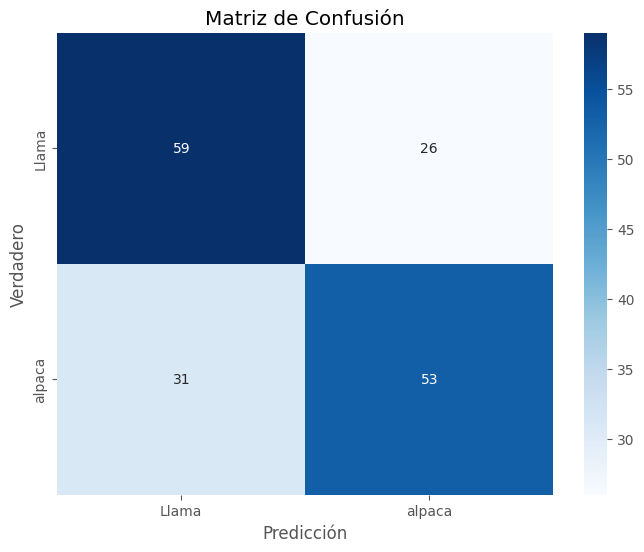

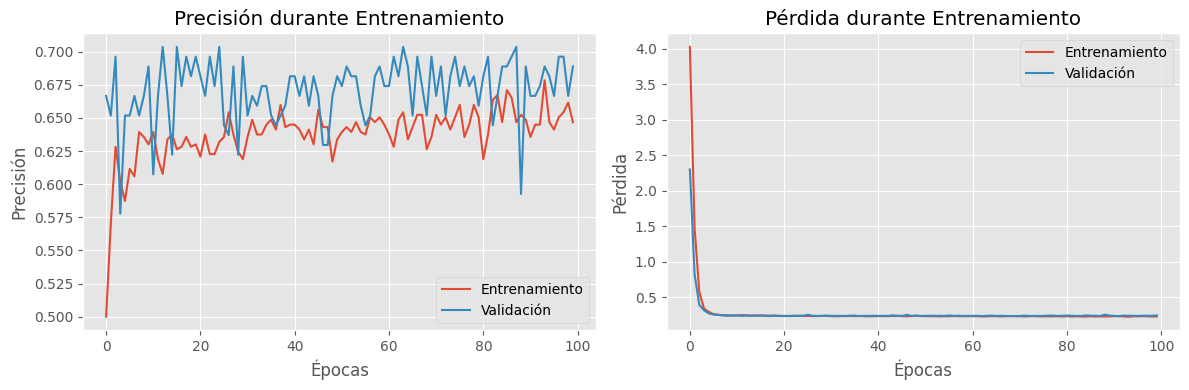

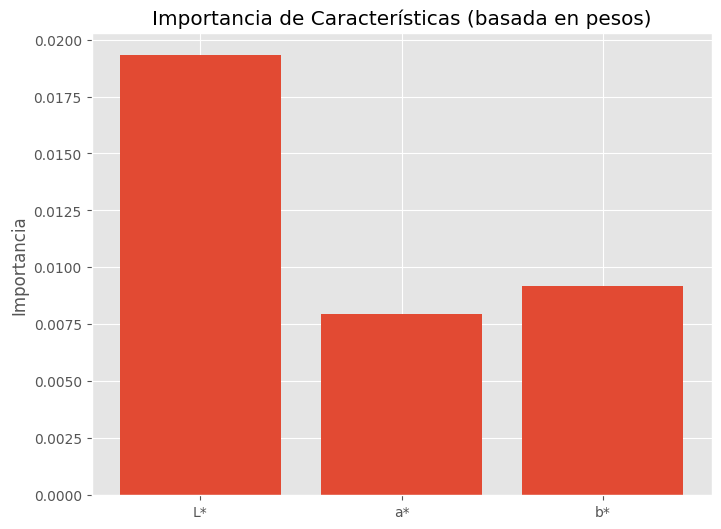


Importancia de características:
L*: 0.0193
a*: 0.0080
b*: 0.0092

Predicción para L*=34.0, a*=14.0, b*=9.0:
Origen: Llama (probabilidad: 36.91%)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Deep learning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Configuración
np.random.seed(42)
plt.style.use('ggplot')

# 1. CARGAR Y PREPARAR DATOS (simulados basados en tus estadísticas)
# En la práctica, reemplazarías esto con: df = pd.read_csv('tus_datos.csv')
def generar_datos_simulados(n_muestras=421):
    # Datos para llama
    llama_L = np.random.normal(33.86, 3.46, n_muestras)
    llama_a = np.random.normal(13.91, 3.60, n_muestras)
    llama_b = np.random.normal(9.12, 1.79, n_muestras)
    llama_df = pd.DataFrame({'L*': llama_L, 'a*': llama_a, 'b*': llama_b, 'Origen': 'Llama'})
    
    # Datos para alpaca
    alpaca_L = np.random.normal(34.12, 5.63, n_muestras)
    alpaca_a = np.random.normal(14.53, 3.66, n_muestras)
    alpaca_b = np.random.normal(9.51, 2.12, n_muestras)
    alpaca_df = pd.DataFrame({'L*': alpaca_L, 'a*': alpaca_a, 'b*': alpaca_b, 'Origen': 'alpaca'})
    
    return pd.concat([llama_df, alpaca_df], ignore_index=True)

# Generar datos simulados (en tu caso, cargarías tus datos reales)
df = generar_datos_simulados()

# 2. PREPROCESAMIENTO
# Codificar la variable objetivo
le = LabelEncoder()
df['Origen_encoded'] = le.fit_transform(df['Origen'])

# Separar características y target
X = df[['L*', 'a*', 'b*']].values
y = df['Origen_encoded'].values

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. CONSTRUCCIÓN DEL MODELO
model = Sequential([
    Dense(1400, activation='relu', input_shape=(3,), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1400, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1400, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1500, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1400, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy']
)

# 4. ENTRENAMIENTO
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=10)
]

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 5. EVALUACIÓN
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nPrecisión en prueba: {test_acc:.2%}')

# Predicciones
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()

# 6. GRÁFICOS DE EVOLUCIÓN DEL ENTRENAMIENTO
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# 7. INTERPRETACIÓN DEL MODELO (Importancia de características)
# Obtener pesos de la primera capa
weights = model.layers[0].get_weights()[0]
importance = np.mean(np.abs(weights), axis=1)
feature_names = ['L*', 'a*', 'b*']

plt.figure(figsize=(8, 6))
plt.bar(feature_names, importance)
plt.title('Importancia de Características (basada en pesos)')
plt.ylabel('Importancia')
plt.show()

print("\nImportancia de características:")
for i, feat in enumerate(feature_names):
    print(f'{feat}: {importance[i]:.4f}')

# 8. FUNCIÓN PARA PREDECIR NUEVAS MUESTRAS
def predecir_origen(L, a, b):
    # Escalar los nuevos datos
    nuevos_datos = np.array([[L, a, b]])
    nuevos_datos_escalados = scaler.transform(nuevos_datos)
    
    # Predecir
    probabilidad = model.predict(nuevos_datos_escalados, verbose=0)[0][0]
    clase_predicha = int(probabilidad > 0.5)
    
    return le.inverse_transform([clase_predicha])[0], probabilidad

# Ejemplo de predicción
ejemplo_L, ejemplo_a, ejemplo_b = 34.0, 14.0, 9.0
origen_predicho, prob = predecir_origen(ejemplo_L, ejemplo_a, ejemplo_b)
print(f"\nPredicción para L*={ejemplo_L}, a*={ejemplo_a}, b*={ejemplo_b}:")
print(f"Origen: {origen_predicho} (probabilidad: {prob:.2%})")

Epoch 1/500


/home/sebastian/ia/estable/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4902 - loss: 0.7487 - val_accuracy: 0.5407 - val_loss: 0.7324 - learning_rate: 0.0010
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4926 - loss: 0.7395 - val_accuracy: 0.5481 - val_loss: 0.7309 - learning_rate: 0.0010
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5891 - loss: 0.7130 - val_accuracy: 0.5111 - val_loss: 0.7334 - learning_rate: 0.0010
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6030 - loss: 0.7086 - val_accuracy: 0.5630 - val_loss: 0.7245 - learning_rate: 0.0010
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5934 - loss: 0.7163 - val_accuracy: 0.5852 - val_loss: 0.7215 - learning_rate: 0.0010
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5840 - loss: 0.7117 - val_accuracy: 0.5704 - val_loss: 0.7164 - learning_rate: 0.0010
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5958 - loss: 0.7030 - val_accuracy: 0.6

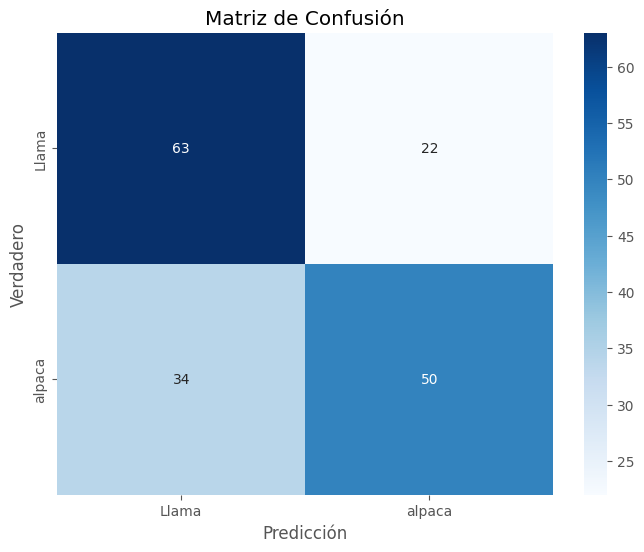

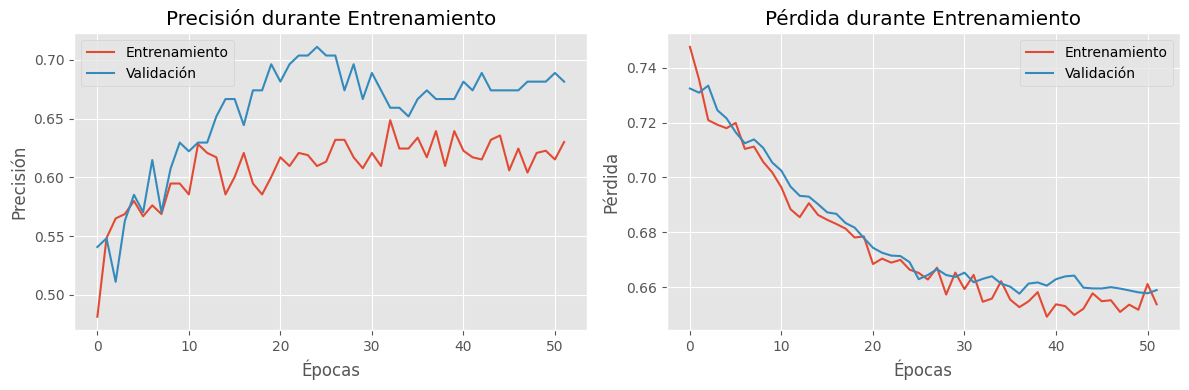

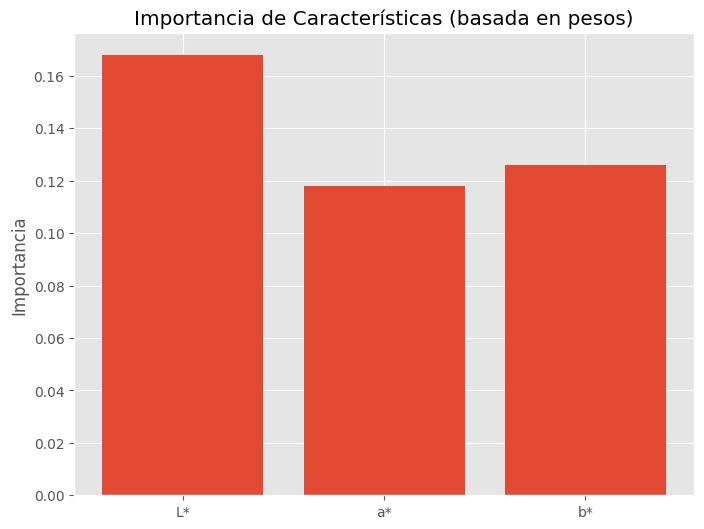


Importancia de características:
L*: 0.1679
a*: 0.1180
b*: 0.1259

Predicción para L*=34.0, a*=14.0, b*=9.0:
Origen: Llama (probabilidad: 37.31%)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Deep learning
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Configuración
np.random.seed(42)
plt.style.use('ggplot')

# 1. CARGAR Y PREPARAR DATOS (simulados basados en tus estadísticas)
# En la práctica, reemplazarías esto con: df = pd.read_csv('tus_datos.csv')
def generar_datos_simulados(n_muestras=421):
    # Datos para llama
    llama_L = np.random.normal(33.86, 3.46, n_muestras)
    llama_a = np.random.normal(13.91, 3.60, n_muestras)
    llama_b = np.random.normal(9.12, 1.79, n_muestras)
    llama_df = pd.DataFrame({'L*': llama_L, 'a*': llama_a, 'b*': llama_b, 'Origen': 'Llama'})
    
    # Datos para alpaca
    alpaca_L = np.random.normal(34.12, 5.63, n_muestras)
    alpaca_a = np.random.normal(14.53, 3.66, n_muestras)
    alpaca_b = np.random.normal(9.51, 2.12, n_muestras)
    alpaca_df = pd.DataFrame({'L*': alpaca_L, 'a*': alpaca_a, 'b*': alpaca_b, 'Origen': 'alpaca'})
    
    return pd.concat([llama_df, alpaca_df], ignore_index=True)

# Generar datos simulados (en tu caso, cargarías tus datos reales)
df = generar_datos_simulados()

# 2. PREPROCESAMIENTO
# Codificar la variable objetivo
le = LabelEncoder()
df['Origen_encoded'] = le.fit_transform(df['Origen'])

# Separar características y target
X = df[['L*', 'a*', 'b*']].values
y = df['Origen_encoded'].values

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. CONSTRUCCIÓN DEL MODELO
model = Sequential([
    Dense(64, activation='relu', input_shape=(3,), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 4. ENTRENAMIENTO
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=10)
]

history = model.fit(
    X_train_scaled, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=callbacks
)

# 5. EVALUACIÓN
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'\nPrecisión en prueba: {test_acc:.2%}')

# Predicciones
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')
plt.show()

# 6. GRÁFICOS DE EVOLUCIÓN DEL ENTRENAMIENTO
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# 7. INTERPRETACIÓN DEL MODELO (Importancia de características)
# Obtener pesos de la primera capa
weights = model.layers[0].get_weights()[0]
importance = np.mean(np.abs(weights), axis=1)
feature_names = ['L*', 'a*', 'b*']

plt.figure(figsize=(8, 6))
plt.bar(feature_names, importance)
plt.title('Importancia de Características (basada en pesos)')
plt.ylabel('Importancia')
plt.show()

print("\nImportancia de características:")
for i, feat in enumerate(feature_names):
    print(f'{feat}: {importance[i]:.4f}')

# 8. FUNCIÓN PARA PREDECIR NUEVAS MUESTRAS
def predecir_origen(L, a, b):
    # Escalar los nuevos datos
    nuevos_datos = np.array([[L, a, b]])
    nuevos_datos_escalados = scaler.transform(nuevos_datos)
    
    # Predecir
    probabilidad = model.predict(nuevos_datos_escalados, verbose=0)[0][0]
    clase_predicha = int(probabilidad > 0.5)
    
    return le.inverse_transform([clase_predicha])[0], probabilidad

# Ejemplo de predicción
ejemplo_L, ejemplo_a, ejemplo_b = 34.0, 14.0, 9.0
origen_predicho, prob = predecir_origen(ejemplo_L, ejemplo_a, ejemplo_b)
print(f"\nPredicción para L*={ejemplo_L}, a*={ejemplo_a}, b*={ejemplo_b}:")
print(f"Origen: {origen_predicho} (probabilidad: {prob:.2%})")